# Task #6 Prediction using Decision Tree Algorithm (TSF)
## Name: Muhammad Fahad

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_csv("Iris (1).csv")

In [3]:
data1.sample(7)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
146,147,6.3,2.5,5.0,1.9,Iris-virginica
122,123,7.7,2.8,6.7,2.0,Iris-virginica
83,84,6.0,2.7,5.1,1.6,Iris-versicolor
46,47,5.1,3.8,1.6,0.2,Iris-setosa
144,145,6.7,3.3,5.7,2.5,Iris-virginica
32,33,5.2,4.1,1.5,0.1,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data1.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data1.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

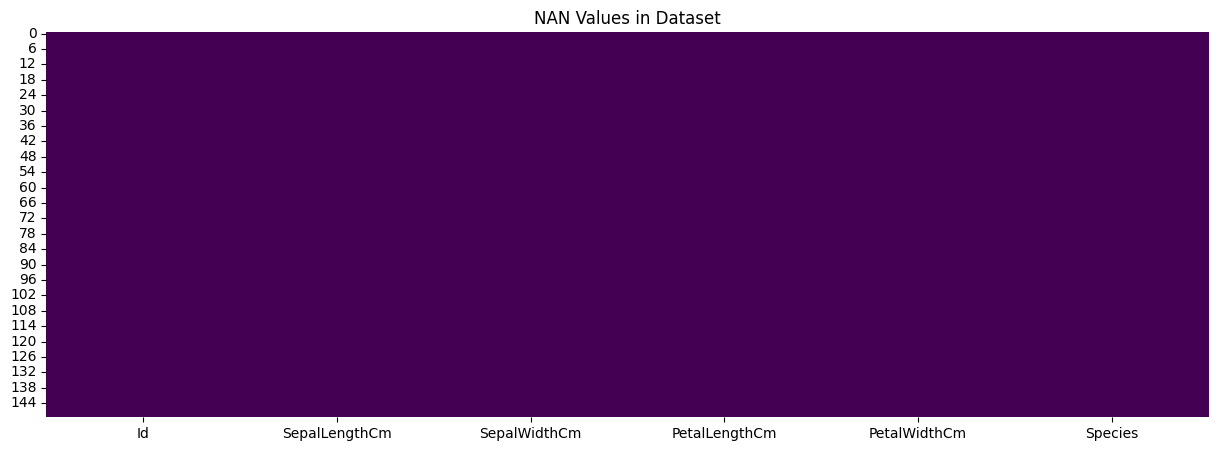

In [7]:
plt.figure(figsize=(15,5))
sns.heatmap(data1.isnull(), cmap='viridis', cbar=False)
plt.title('NAN Values in Dataset')
plt.show()

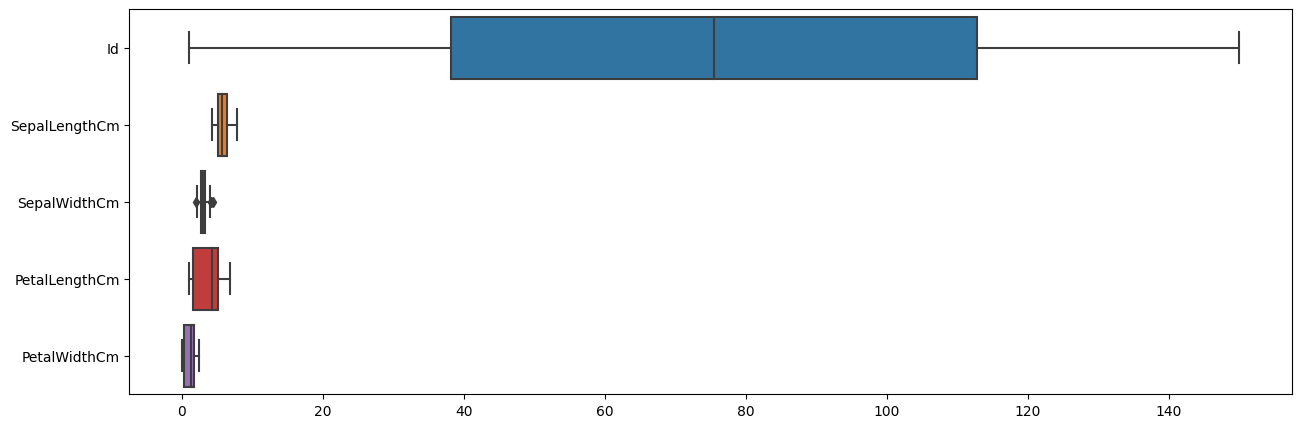

In [8]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data1, orient='h')
plt.show()

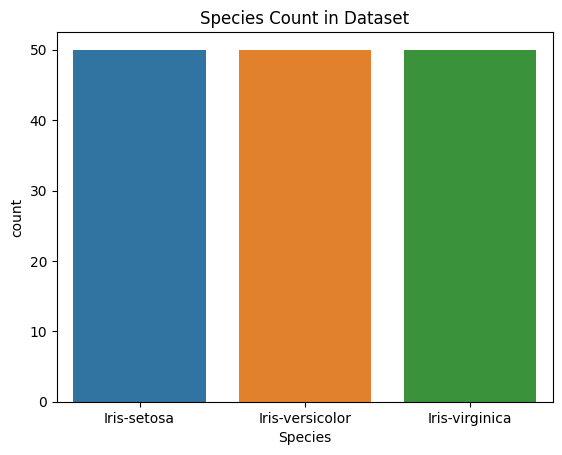

In [9]:
sns.countplot(x='Species', data=data1)
plt.title('Species Count in Dataset')
plt.show()

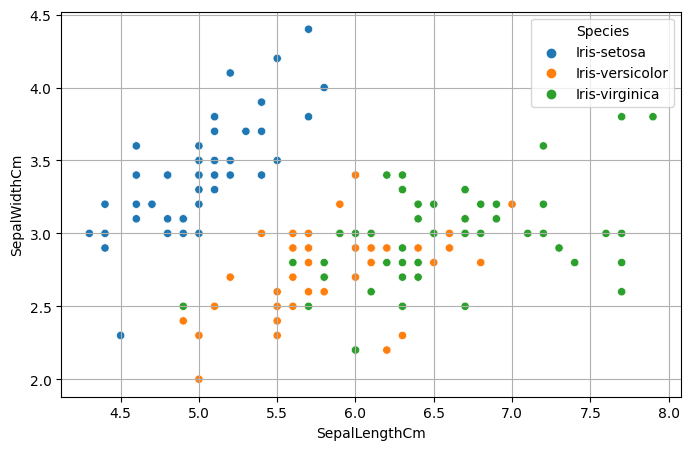

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=data1, color='navy',hue='Species')
plt.grid(True)

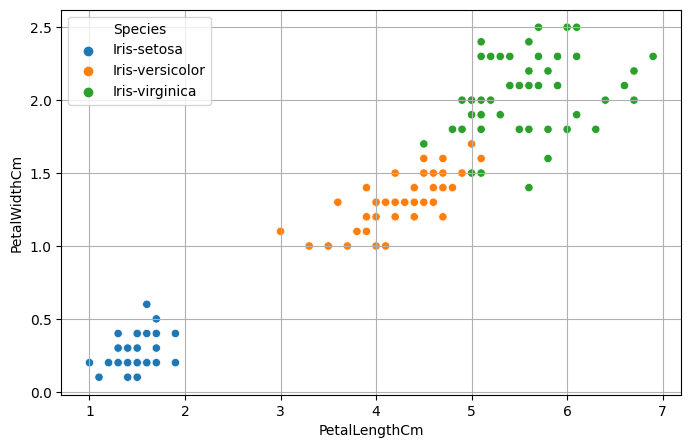

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=data1, color='navy',hue='Species')
plt.grid(True)

In [12]:
X = data1.drop('Species', axis=1)
y = data1['Species']

In [13]:
# Data Splitting
X_train ,X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 5), (30, 5), (120,), (30,))

In [14]:
# Model Training
dtc = DecisionTreeClassifier().fit(X_train, y_train)

In [19]:
dtc_pred = dtc.predict(X_test)
pd.DataFrame(np.c_[y_test,dtc_pred],columns=['Actual','Predicted']).head(n=10)

,Actual,Predicted
0,Iris-versicolor,Iris-versicolor
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica
3,Iris-versicolor,Iris-versicolor
4,Iris-versicolor,Iris-versicolor
5,Iris-setosa,Iris-setosa
6,Iris-versicolor,Iris-versicolor
7,Iris-virginica,Iris-virginica
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor


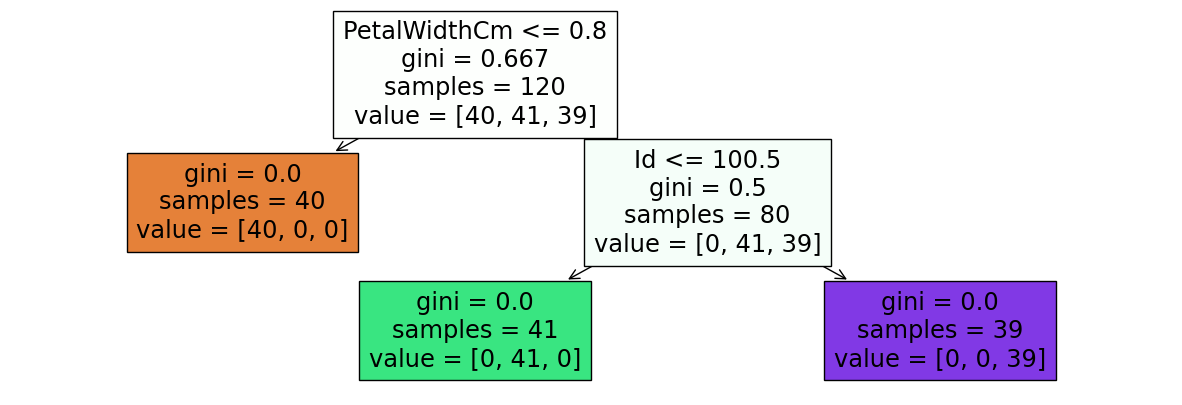

In [16]:
plt.figure(figsize =(15,5))  # Decision Tree  
plot_tree(dtc, feature_names=X_train.columns, max_depth=10, filled=True);

            Testing and Training Accuracy 
----------------------------------------------------
Testing Accuracy  : 100.0 %
Training Accuracy : 100.0 %
----------------------------------------------------
                Classification Report
----------------------------------------------------
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

----------------------------------------------------
                  Confusion Matrix 
----------------------------------------------------


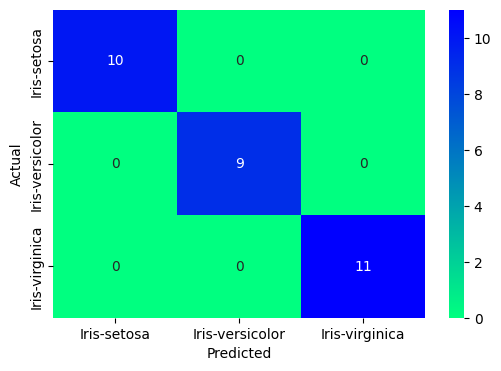

In [18]:
# Model Evaluation
print("            Testing and Training Accuracy " )
print("----------------------------------------------------")
dtc_train = dtc.score(X_train, y_train)*100
dtc_test = dtc.score(X_test, y_test)*100
print('Testing Accuracy  :',round(dtc_test,2),"%")
print('Training Accuracy :',round(dtc_train,2),"%")
print("----------------------------------------------------")
print("                Classification Report")
print("----------------------------------------------------")
print(classification_report(dtc_pred, y_test))
print("----------------------------------------------------")
print("                  Confusion Matrix ")
print("----------------------------------------------------")
plt.figure(figsize=(6,4))
data = confusion_matrix(y_test, dtc_pred)
dtc_con = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
sns.heatmap(dtc_con, annot=True, fmt='g',cmap="winter_r")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# -- Notebook End --